# Импорт

In [1]:
import os.path as path_
from datetime import datetime

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import Dataset, train, cv, plot_importance

# Глобальные переменные и функции

In [3]:
data_path = 'data/'
submits_path = 'submits/'
seed = 110894

# Загружаем данные

In [4]:
!ls -l $data_path

total 3700
-rw-r--r-- 1 jupyter-v.pashentsev-2 jupyter-v.pashentsev-2   65141 Mar  7 07:52 HW_test_additional_data.csv
-rw-r--r-- 1 jupyter-v.pashentsev-2 jupyter-v.pashentsev-2   51768 Mar  7 07:52 HW_test_main_data.csv
-rw-r--r-- 1 jupyter-v.pashentsev-2 jupyter-v.pashentsev-2 1877934 Mar  7 07:52 HW_train_additional_data.csv
-rw-r--r-- 1 jupyter-v.pashentsev-2 jupyter-v.pashentsev-2 1788320 Mar  7 07:52 HW_train_main_data.csv


In [5]:
df_train = pd.read_csv(path_.join(data_path, 'HW_train_main_data.csv'))
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29000 entries, 0 to 28999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   29000 non-null  int64  
 1   timestamp            29000 non-null  object 
 2   full_sq              29000 non-null  int64  
 3   life_sq              22935 non-null  float64
 4   floor                28843 non-null  float64
 5   max_floor            19887 non-null  float64
 6   material             19887 non-null  float64
 7   build_year           16059 non-null  float64
 8   num_room             19887 non-null  float64
 9   kitch_sq             19887 non-null  float64
 10  apartment condition  16088 non-null  float64
 11  sub_area             29000 non-null  int64  
 12  price                29000 non-null  float64
dtypes: float64(9), int64(3), object(1)
memory usage: 2.9+ MB


In [6]:
df_train_add = pd.read_csv(path_.join(data_path, 'HW_train_additional_data.csv'))
df_train_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29000 entries, 0 to 28999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               29000 non-null  int64  
 1   population                       29000 non-null  int64  
 2   indust_part                      29000 non-null  float64
 3   preschool_facilities             29000 non-null  int64  
 4   school_facilities                29000 non-null  int64  
 5   hospital_beds_raion              15253 non-null  float64
 6   healthcare_facilities            29000 non-null  int64  
 7   university_num                   29000 non-null  int64  
 8   sport_objects_facilities         29000 non-null  int64  
 9   additional_education_facilities  29000 non-null  int64  
 10  culture_objects_facilities       29000 non-null  int64  
 11  shopping_centers_facilities      29000 non-null  int64  
 12  office_num        

In [7]:
df_test = pd.read_csv(path_.join(data_path, 'HW_test_main_data.csv'))
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1000 non-null   int64  
 1   timestamp            1000 non-null   object 
 2   full_sq              1000 non-null   int64  
 3   life_sq              797 non-null    float64
 4   floor                995 non-null    float64
 5   max_floor            688 non-null    float64
 6   material             688 non-null    float64
 7   build_year           559 non-null    float64
 8   num_room             688 non-null    float64
 9   kitch_sq             688 non-null    float64
 10  apartment condition  565 non-null    float64
 11  sub_area             1000 non-null   int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 93.9+ KB


In [8]:
df_test_add = pd.read_csv(path_.join(data_path, 'HW_test_additional_data.csv'))
df_test_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               1000 non-null   int64  
 1   population                       1000 non-null   int64  
 2   indust_part                      1000 non-null   float64
 3   preschool_facilities             1000 non-null   int64  
 4   school_facilities                1000 non-null   int64  
 5   hospital_beds_raion              544 non-null    float64
 6   healthcare_facilities            1000 non-null   int64  
 7   university_num                   1000 non-null   int64  
 8   sport_objects_facilities         1000 non-null   int64  
 9   additional_education_facilities  1000 non-null   int64  
 10  culture_objects_facilities       1000 non-null   int64  
 11  shopping_centers_facilities      1000 non-null   int64  
 12  office_num           

# Смотрим формат submit-ов

In [9]:
!ls -l $submits_path

total 480
-rw-r--r-- 1 jupyter-v.pashentsev-2 jupyter-v.pashentsev-2   245 Mar  7 07:52 submission_example_2_1.txt
-rw-r--r-- 1 jupyter-v.pashentsev-2 jupyter-v.pashentsev-2 22577 Mar  7 07:52 submission_example_2_2.csv
-rw-r--r-- 1 jupyter-v.pashentsev-2 jupyter-v.pashentsev-2   459 Mar 11 14:06 submit_1.txt
-rw-r--r-- 1 jupyter-v.pashentsev-2 jupyter-v.pashentsev-2 28034 Mar 11 14:06 submit_2_baseline.csv
-rw-r--r-- 1 jupyter-v.pashentsev-2 jupyter-v.pashentsev-2 28031 Mar 11 14:07 submit_2_cv_max.csv
-rw-r--r-- 1 jupyter-v.pashentsev-2 jupyter-v.pashentsev-2 28027 Mar 11 14:07 submit_2_cv_mean.csv
-rw-r--r-- 1 jupyter-v.pashentsev-2 jupyter-v.pashentsev-2 28007 Mar 11 14:07 submit_2_cv_min.csv
-rw-r--r-- 1 jupyter-v.pashentsev-2 jupyter-v.pashentsev-2 28017 Mar 11 14:07 submit_2_fillna_by_frac_life_sq.csv
-rw-r--r-- 1 jupyter-v.pashentsev-2 jupyter-v.pashentsev-2 28037 Mar 11 14:07 submit_2_fillna_mean_life_sq.csv
-rw-r--r-- 1 jupyter-v.pashentsev-2 jupyter-v.pashentsev-2 28041 Mar 

In [10]:
with open(path_.join(submits_path, 'submission_example_2_1.txt')) as file:
    str_ex_submit_1 = file.read()
print(str_ex_submit_1)

0000, 1111, 2222, 33333, 4444, 55555, 6666, 7777, 88888, 9999
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, ...
111, 2222, 3333, 44444, 55555
10000
0.999999999999999, 0.9999999



In [11]:
df_ex_submit_2 = pd.read_csv(path_.join(submits_path, 'submission_example_2_2.csv'))
df_ex_submit_2.head()

,id,predicted_price
0,10,11.323928
1,11,10.878658
2,12,28.242655
3,13,23.924738
4,14,13.952347


# Решаем первое задание

###### Топ-10 дорогих квартир

In [12]:
str_top10_price = ', '.join(df_train.sort_values('price').iloc[-10:,0].apply(str))
str_top10_price

'40136, 92747, 63901, 95572, 45584, 91175, 78059, 88100, 14154, 85073'

###### Самые дорогие квартиры по месяцам

In [13]:
ss_max_price_id_by_mnth = (
    df_train
    .groupby(
        df_train['timestamp']
        .astype(np.datetime64)
        .dt
        .strftime('%Y-%m')
    )
    .agg({'price': lambda x: x.idxmax()})
    .astype(int)
)
ss_max_price_id_by_mnth.head()

,price
timestamp,
2011-09,22408
2011-10,28566
2011-11,24188
2011-12,27279
2012-01,20316


In [14]:
#Проверка
(
    df_train
    .loc[
        (df_train['timestamp'].astype(np.datetime64).dt.year == 2011) 
        & (df_train['timestamp'].astype(np.datetime64).dt.month == 10), 
        :
    ]
    .sort_values('price')
    .tail(1)
)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price
28566,39837,2011-10-19,81,46.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,32,18043800.0


In [15]:
str_max_price_id_by_mnth = ', '.join(ss_max_price_id_by_mnth['price'].apply(str))
str_max_price_id_by_mnth

'22408, 28566, 24188, 27279, 20316, 27461, 8417, 26644, 18117, 10035, 26274, 26321, 9030, 16898, 28806, 7537, 15912, 3163, 26225, 3767, 27095, 14807, 24097, 20799, 20649, 10213, 8788, 20082, 6981, 1740, 7055, 12729, 5582, 15217, 18599, 5942, 28868, 25278, 13329, 2526, 9340, 14321, 5829, 6705, 7755, 12483, 2014'

###### Топ-5 самы больших квартир

In [16]:
str_top5_square = ', '.join(df_train.sort_values('full_sq').iloc[-5:,0].apply(str))
str_top5_square

'41202, 49518, 32115, 95936, 95156'

###### Кол-во пропусков

In [17]:
str_na_cnt = str(df_train['life_sq'].isna().sum())
str_na_cnt

'6065'

###### Корреляция

In [18]:
str_corr_1 = str(df_train.corr().loc['price', 'full_sq'])
str_corr_1

'0.33711308742057117'

In [19]:
df_train.fillna({'life_sq': 0.0}).corr().loc['price', 'life_sq']

0.3583523865232129

In [20]:
df_train.fillna({'life_sq': df_train['life_sq'].mean()}).corr().loc['price', 'life_sq']

0.38005124559109627

In [21]:
df_train.fillna({'life_sq': df_train['life_sq'].median()}).corr().loc['price', 'life_sq']

0.38655858311442803

In [22]:
str_corr_2 = str(df_train.fillna({'life_sq': df_train['life_sq'].mean()}).corr().loc['price', 'life_sq'])
str_corr_2

'0.38005124559109627'

In [23]:
str_corr = str_corr_1 + ', ' + str_corr_2
str_corr

'0.33711308742057117, 0.38005124559109627'

###### Оформляем ответ на первое задание

In [24]:
str_submit_1 = '\n'.join([str_top10_price, str_max_price_id_by_mnth, str_top5_square, str_na_cnt, str_corr])
str_submit_1

'40136, 92747, 63901, 95572, 45584, 91175, 78059, 88100, 14154, 85073\n22408, 28566, 24188, 27279, 20316, 27461, 8417, 26644, 18117, 10035, 26274, 26321, 9030, 16898, 28806, 7537, 15912, 3163, 26225, 3767, 27095, 14807, 24097, 20799, 20649, 10213, 8788, 20082, 6981, 1740, 7055, 12729, 5582, 15217, 18599, 5942, 28868, 25278, 13329, 2526, 9340, 14321, 5829, 6705, 7755, 12483, 2014\n41202, 49518, 32115, 95936, 95156\n6065\n0.33711308742057117, 0.38005124559109627'

In [25]:
with open(path_.join(submits_path, 'submit_1.txt'), mode='w') as file:
    file.write(str_submit_1)

# Решаем второе задание

In [204]:
df_whole_train = df_train.merge(df_train_add, on='id').rename(columns={'apartment condition': 'apartment_condition'})
df_whole_test = df_test.merge(df_test_add, on='id').rename(columns={'apartment condition': 'apartment_condition'})

In [205]:
df_whole_train['year_month'] = df_whole_train['timestamp'].str[:7].astype('category')
df_whole_test['year_month'] = df_whole_test['timestamp'].str[:7].astype('category')

Строим бэйзлайн модель

In [206]:
X = df_whole_train.drop(columns=['id', 'timestamp', 'price'])
X_test = df_whole_test.drop(columns=['id', 'timestamp'])
y = df_whole_train.loc[:, 'price']

In [207]:
(
    X_train, X_valid,
    y_train, y_valid,
) = train_test_split(
    X, y,
    test_size=0.3,
    random_state=seed,
)

In [208]:
lgb_train = Dataset(X_train, y_train)
lgb_valid = Dataset(X_valid, y_valid, reference=lgb_train)
lgb_model = train(
    params={
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'seed': seed,
    },
    train_set=lgb_train,
    num_boost_round=100_00,
    valid_sets=[lgb_train, lgb_valid],
    valid_names=['train', 'valid'],
    early_stopping_rounds=100,
    verbose_eval=100,
)

/home/jupyter-v.pashentsev-2/.local/lib/python3.7/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/home/jupyter-v.pashentsev-2/.local/lib/python3.7/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 100 rounds
[100]	train's rmse: 2.06951e+06	valid's rmse: 3.00618e+06
[200]	train's rmse: 1.80304e+06	valid's rmse: 3.00834e+06
Early stopping, best iteration is:
[126]	train's rmse: 1.98213e+06	valid's rmse: 2.99944e+06


In [209]:
df_submit_2 = pd.DataFrame(index=df_whole_test.index)
df_submit_2['id'] = df_whole_test['id']
df_submit_2['predicted_price'] = lgb_model.predict(X_test)
df_submit_2.to_csv(path_.join(submits_path, 'submit_2_baseline.csv'))

RMSE = 2681637.1405

Попробуем сделать предсказание на n фолдах

In [210]:
X = df_whole_train.drop(columns=['id', 'timestamp', 'price'])
X_test = df_whole_test.drop(columns=['id', 'timestamp'])
y = df_whole_train.loc[:, 'price']

In [211]:
lgb_train = Dataset(X, y)
lgb_cv_res = cv(
    params={
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'seed': seed,
    },
    train_set=lgb_train,
    num_boost_round=100_000,
    stratified=False,
    early_stopping_rounds=100,
    verbose_eval=100,
    eval_train_metric=True,
    return_cvbooster=True,
)

[100]	cv_agg's train rmse: 2.16705e+06 + 32906.1	cv_agg's valid rmse: 2.86231e+06 + 171399
[200]	cv_agg's train rmse: 1.9141e+06 + 34111	cv_agg's valid rmse: 2.85598e+06 + 173090
[300]	cv_agg's train rmse: 1.72991e+06 + 36183.2	cv_agg's valid rmse: 2.85729e+06 + 172239


In [212]:
df_submit_2 = pd.DataFrame(index=df_whole_test.index)
df_submit_2['id'] = df_whole_test['id']
df_submit_2['predicted_price'] = np.mean([b.predict(X_test) for b in lgb_cv_res['cvbooster'].boosters], axis=0)
df_submit_2.to_csv(path_.join(submits_path, 'submit_2_cv_mean.csv'))

RMSE = 2479036.0655

Смотрим на важность признаков

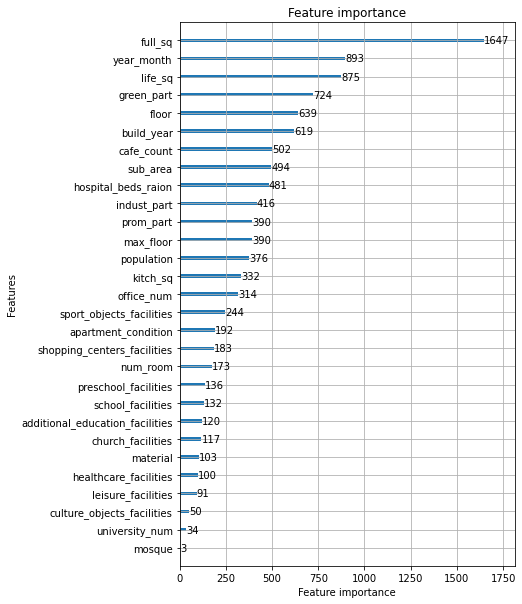

In [213]:
plot_importance(lgb_cv_res['cvbooster'].boosters[0], figsize=(6, 10))

Фича full_sq доминирует. Посмотрим на нее

In [214]:
df_whole_train['full_sq'].describe()

count    29000.000000
mean        55.235345
std         38.781299
min          0.000000
25%         40.000000
50%         50.000000
75%         64.000000
max       5329.000000
Name: full_sq, dtype: float64

In [215]:
df_whole_test['full_sq'].describe()

count    1000.000000
mean       54.196000
std        18.820728
min         2.000000
25%        39.000000
50%        50.500000
75%        65.000000
max       151.000000
Name: full_sq, dtype: float64

Посмотрим на топ минимальных значений

In [216]:
np.sort(df_whole_train['full_sq'].unique())[:20]

array([ 0,  1,  2,  3,  4,  8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24])

Посмотрим на эти квартиры

In [217]:
df_whole_train[df_whole_train['full_sq'] < 8][df_whole_train.columns[:13]]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment_condition,sub_area,price
72,63720,2014-09-17,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,103,6487600.0
2000,14771,2014-12-09,2,1.0,19.0,4.0,1.0,1.0,1.0,1.0,1.0,65,17582500.0
3095,16489,2014-06-13,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,134,6715700.0
4150,45451,2014-10-01,4,1.0,7.0,19.0,1.0,2015.0,3.0,1.0,1.0,101,6145300.0
5142,42761,2014-10-28,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,72,4891200.0
6097,69823,2015-01-12,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,71,16529100.0
6794,81622,2014-12-22,1,64.0,22.0,22.0,1.0,NaN,2.0,1.0,1.0,18,15440100.0
8028,55095,2014-05-02,1,1.0,1.0,1.0,4.0,1.0,1.0,1.0,3.0,105,8688600.0
8640,58538,2014-10-07,3,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,30,27668000.0
9664,47907,2014-06-01,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,105,4531200.0


In [218]:
df_whole_test[df_whole_test['full_sq'] < 8][df_whole_test.columns[:12]]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment_condition,sub_area
997,11218,2014-12-18,2,1.0,26.0,1.0,1.0,1.0,1.0,1.0,1.0,54


Видно что среди минимальных значений присутствуют квартиры с площадью 0 и 1, что невозможно. Удалим их

In [219]:
X = df_whole_train.drop(columns=['id', 'timestamp', 'price'])
X_test = df_whole_test.drop(columns=['id', 'timestamp'])
y = df_whole_train.loc[:, 'price']

In [220]:
mask = X['full_sq'] > 1
X = X.loc[mask, :]
y = y[mask]

In [221]:
lgb_train = Dataset(X, y)
lgb_cv_res = cv(
    params={
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'seed': seed,
    },
    train_set=lgb_train,
    num_boost_round=100_000,
    stratified=False,
    early_stopping_rounds=100,
    verbose_eval=100,
    eval_train_metric=True,
    return_cvbooster=True,
)

[100]	cv_agg's train rmse: 2.16103e+06 + 39864.1	cv_agg's valid rmse: 2.85988e+06 + 220067
[200]	cv_agg's train rmse: 1.90572e+06 + 30557.6	cv_agg's valid rmse: 2.84952e+06 + 219669


In [222]:
df_submit_2 = pd.DataFrame(index=df_whole_test.index)
df_submit_2['id'] = df_whole_test['id']
df_submit_2['predicted_price'] = np.mean([b.predict(X_test) for b in lgb_cv_res['cvbooster'].boosters], axis=0)
df_submit_2.to_csv(path_.join(submits_path, 'submit_2_full_sq_remove_0_1.csv'))

RMSE = 2472479.0758

In [223]:
df_whole_train = df_whole_train.loc[df_whole_train['full_sq'] > 1, :]
df_whole_train.shape

(28988, 32)

Посмотрим на топ максимальных значений

In [224]:
np.sort(df_whole_train['full_sq'].unique())[-20:]

array([ 218,  219,  222,  226,  276,  291,  303,  326,  355,  391,  394,
        409,  413,  462,  604,  635,  636,  639,  731, 5329])

In [225]:
df_whole_train[df_whole_train['full_sq'] > 250][df_whole_train.columns[:13]]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment_condition,sub_area,price
2750,91769,2014-11-07,604,NaN,16.0,18.0,1.0,NaN,2.0,1.0,NaN,48,6815800.0
5041,52414,2011-10-20,326,325.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,33,5285000.0
6172,32115,2014-10-20,639,637.0,18.0,19.0,4.0,2016.0,2.0,10.0,1.0,134,5150400.0
9283,49518,2013-02-12,636,38.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,55,11148600.0
9423,21211,2012-06-09,413,17.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,24,6251500.0
9507,47034,2014-06-14,276,232.0,11.0,37.0,6.0,2009.0,5.0,26.0,1.0,119,17192800.0
9561,11221,2012-04-01,355,20.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,124,5073000.0
12729,43686,2014-04-25,303,NaN,32.0,32.0,1.0,NaN,6.0,0.0,NaN,77,59417300.0
13473,41202,2014-05-15,635,NaN,3.0,17.0,1.0,NaN,2.0,0.0,NaN,72,6138600.0
13702,61536,2012-04-07,394,17.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,56,1073100.0


In [226]:
df_whole_test[df_whole_test['full_sq'] > 250][df_whole_test.columns[:12]]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment_condition,sub_area


На трейне есть значения которых нет в тесте. Уберем их

In [227]:
X = df_whole_train.drop(columns=['id', 'timestamp', 'price'])
X_test = df_whole_test.drop(columns=['id', 'timestamp'])
y = df_whole_train.loc[:, 'price']

In [228]:
mask = X['full_sq'] <= 250
X = X.loc[mask, :]
y = y[mask]

In [229]:
lgb_train = Dataset(X, y)
lgb_cv_res = cv(
    params={
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'seed': seed,
    },
    train_set=lgb_train,
    num_boost_round=100_000,
    stratified=False,
    early_stopping_rounds=100,
    verbose_eval=100,
    eval_train_metric=True,
    return_cvbooster=True,
)

[100]	cv_agg's train rmse: 2.15713e+06 + 25564.1	cv_agg's valid rmse: 2.82799e+06 + 102810
[200]	cv_agg's train rmse: 1.90716e+06 + 27471	cv_agg's valid rmse: 2.8202e+06 + 114126


In [230]:
df_submit_2 = pd.DataFrame(index=df_whole_test.index)
df_submit_2['id'] = df_whole_test['id']
df_submit_2['predicted_price'] = np.mean([b.predict(X_test) for b in lgb_cv_res['cvbooster'].boosters], axis=0)
df_submit_2.to_csv(path_.join(submits_path, 'submit_2_full_sq_remove_greatest_250.csv'))

RMSE = 2519300.0844. Качество просело

Посмотрим на зависимость между таргетом и этой фичей

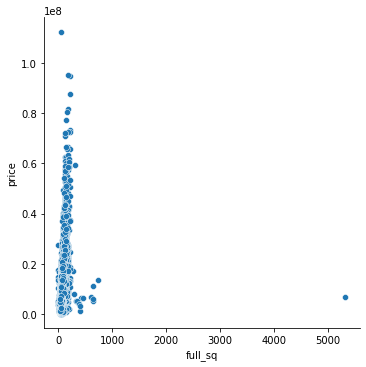

In [231]:
sns.relplot(x='full_sq', y='price', data=df_whole_train)

Есть выброс справа внизу и слева вверху

In [232]:
df_whole_train[df_whole_train['price'] == df_whole_train['price'].max()][df_whole_train.columns[:13]]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment_condition,sub_area,price
18117,85073,2012-05-15,57,31.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,130,112444400.0


Непонятно с чего эта квартира столько стоит

In [233]:
df_whole_train[df_whole_train['full_sq'] == df_whole_train['full_sq'].max()][df_whole_train.columns[:13]]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment_condition,sub_area,price
19303,95156,2012-09-19,5329,22.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,10,6841300.0


А здесь явно ошибочное значение

Попробуем первое удалить, а второе заменить

In [234]:
X = df_whole_train.drop(columns=['id', 'timestamp', 'price'])
X_test = df_whole_test.drop(columns=['id', 'timestamp'])
y = df_whole_train.loc[:, 'price']

In [235]:
mask = df_whole_train['price'] != 112444400.0
X = X.loc[mask, :]
X['full_sq'] = X['full_sq'].replace(5329, 53)
y = y[mask]

In [236]:
lgb_train = Dataset(X, y)
lgb_cv_res = cv(
    params={
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'seed': seed,
    },
    train_set=lgb_train,
    num_boost_round=100_000,
    stratified=False,
    early_stopping_rounds=100,
    verbose_eval=100,
    eval_train_metric=True,
    return_cvbooster=True,
)

[100]	cv_agg's train rmse: 2.09814e+06 + 12206.4	cv_agg's valid rmse: 2.80794e+06 + 113151
[200]	cv_agg's train rmse: 1.84599e+06 + 8128.96	cv_agg's valid rmse: 2.79684e+06 + 111664


In [237]:
df_submit_2 = pd.DataFrame(index=df_whole_test.index)
df_submit_2['id'] = df_whole_test['id']
df_submit_2['predicted_price'] = np.mean([b.predict(X_test) for b in lgb_cv_res['cvbooster'].boosters], axis=0)
df_submit_2.to_csv(path_.join(submits_path, 'submit_2_full_sq_handle_outliers_v1.csv'))

RMSE = 2471003.9371

In [238]:
df_whole_train = df_whole_train.loc[df_whole_train['price'] != 112444400.0, :]
df_whole_train['full_sq'] = df_whole_train['full_sq'].replace(5329, 53)
df_whole_train.shape

(28987, 32)

Теперь посмотрим на life_sq

In [239]:
df_whole_train['life_sq'].describe()

count    22922.000000
mean        34.110418
std         20.904443
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max        802.000000
Name: life_sq, dtype: float64

In [240]:
df_whole_test['life_sq'].describe()

count     797.000000
mean       43.037641
std       264.380486
min         1.000000
25%        20.000000
50%        30.000000
75%        43.000000
max      7478.000000
Name: life_sq, dtype: float64

И на трейне и на тесте есть выбросы посмотрим на них

In [242]:
np.sort(df_whole_train['life_sq'].unique())[:10]

array([ 0.,  1.,  7.,  8.,  9., 10., 11., 12., 13., 14.])

In [246]:
df_whole_train[df_whole_train['life_sq'] == 0][df_whole_train.columns[:13]]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment_condition,sub_area,price
1342,85712,2014-11-04,77,0.0,16.0,22.0,1.0,0.0,3.0,0.0,1.0,101,5857100.0
1472,93464,2014-12-25,48,0.0,3.0,12.0,4.0,2015.0,1.0,0.0,3.0,102,5272500.0
1995,48166,2014-11-23,37,0.0,9.0,19.0,1.0,2015.0,1.0,0.0,3.0,101,3833300.0
2493,40961,2012-07-19,41,0.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,72,682600.0
3296,83676,2014-09-06,39,0.0,9.0,0.0,6.0,2016.0,1.0,0.0,1.0,101,3299800.0
3423,58505,2015-01-17,41,0.0,19.0,22.0,1.0,2016.0,1.0,0.0,1.0,101,4499100.0
3442,56555,2014-06-11,72,0.0,10.0,0.0,2.0,2016.0,2.0,0.0,2.0,94,8450200.0
3457,95477,2014-07-30,56,0.0,6.0,0.0,1.0,0.0,2.0,12.0,1.0,102,4881000.0
3593,12269,2014-06-22,52,0.0,11.0,17.0,1.0,0.0,2.0,0.0,1.0,103,6828600.0
3886,18912,2014-10-04,80,0.0,10.0,1.0,2.0,2016.0,3.0,0.0,1.0,70,11961400.0


Для 0 значений можно считать что эта фича не заполнена

In [255]:
np.sort(df_whole_train['life_sq'].unique())[-10:]

array([281., 325., 349., 407., 426., 435., 458., 637., 802.,  nan])

In [256]:
df_whole_train[df_whole_train['life_sq'] > 281][df_whole_train.columns[:13]]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment_condition,sub_area,price
3039,37439,2012-11-16,74,426.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,137,12132900.0
5041,52414,2011-10-20,326,325.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,33,5285000.0
6172,32115,2014-10-20,639,637.0,18.0,19.0,4.0,2016.0,2.0,10.0,1.0,134,5150400.0
12387,89638,2013-09-02,84,802.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,18,13198300.0
15064,90717,2014-08-01,52,349.0,1.0,9.0,1.0,1979.0,3.0,6.0,2.0,124,7538300.0
21331,13539,2013-08-18,77,458.0,12.0,16.0,1.0,1996.0,3.0,10.0,3.0,37,13928700.0
21818,51155,2015-01-06,75,435.0,3.0,22.0,1.0,1999.0,3.0,9.0,3.0,65,14254500.0
26966,73754,2015-02-23,409,407.0,4.0,4.0,4.0,2015.0,1.0,10.0,1.0,24,3140300.0


In [257]:
np.sort(df_whole_test['life_sq'].unique())[-10:]

array([  85.,   88.,   99.,  115.,  123.,  136.,  149.,  301., 7478.,
         nan])

In [258]:
df_whole_test[df_whole_test['life_sq'] > 150][df_whole_test.columns[:12]]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment_condition,sub_area
188,71980,2013-08-15,48,301.0,4.0,12.0,1.0,1973.0,2.0,6.0,2.0,11
535,24392,2014-01-28,79,7478.0,8.0,17.0,1.0,2014.0,3.0,1.0,1.0,105


Можно заметить что есть много значений, в которых жилая площадь больше общей. Их тоже нужно считать как пропуски

Попробуем заменить эти значения по следующему правилу общая площадь умножить среднее соотношение жилой к общей

In [261]:
mask = (
    (df_whole_train['life_sq'] == 0)
    | (df_whole_train['life_sq'] > df_whole_train['full_sq'])
)
mask.sum()

72

In [262]:
(df_whole_train.loc[~mask, 'life_sq'] / df_whole_train.loc[~mask, 'full_sq']).describe()

count    22850.000000
mean         0.621961
std          0.180030
min          0.007353
25%          0.526316
50%          0.586957
75%          0.659091
max          1.000000
dtype: float64

В среднем 62%. Попробуем заменить

In [264]:
X = df_whole_train.drop(columns=['id', 'timestamp', 'price'])
X_test = df_whole_test.drop(columns=['id', 'timestamp'])
y = df_whole_train.loc[:, 'price']

In [265]:
mask = (X['life_sq'] == 0) | (X['life_sq'] > X['full_sq'])
X.loc[mask, 'life_sq'] = X.loc[mask, 'full_sq'] * 0.62
mask = (X_test['life_sq'] == 0) | (X_test['life_sq'] > X_test['full_sq'])
X_test.loc[mask, 'life_sq'] = X_test.loc[mask, 'full_sq'] * 0.62

In [266]:
lgb_train = Dataset(X, y)
lgb_cv_res = cv(
    params={
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'seed': seed,
    },
    train_set=lgb_train,
    num_boost_round=100_000,
    stratified=False,
    early_stopping_rounds=100,
    verbose_eval=100,
    eval_train_metric=True,
    return_cvbooster=True,
)

[100]	cv_agg's train rmse: 2.09917e+06 + 11191	cv_agg's valid rmse: 2.8085e+06 + 106572
[200]	cv_agg's train rmse: 1.84279e+06 + 8954.82	cv_agg's valid rmse: 2.79602e+06 + 104806
[300]	cv_agg's train rmse: 1.66328e+06 + 9925.12	cv_agg's valid rmse: 2.79955e+06 + 106896


In [267]:
df_submit_2 = pd.DataFrame(index=df_whole_test.index)
df_submit_2['id'] = df_whole_test['id']
df_submit_2['predicted_price'] = np.mean([b.predict(X_test) for b in lgb_cv_res['cvbooster'].boosters], axis=0)
df_submit_2.to_csv(path_.join(submits_path, 'submit_2_life_sq_handle_wrong_value.csv'))

RMSE = 2476381.6438. Такой способ ухудшает качество

Заменим только выброс на тесте

In [269]:
X = df_whole_train.drop(columns=['id', 'timestamp', 'price'])
X_test = df_whole_test.drop(columns=['id', 'timestamp'])
y = df_whole_train.loc[:, 'price']

In [270]:
X_test['life_sq'] = X_test['life_sq'].replace(7478.0, 75)

In [271]:
lgb_train = Dataset(X, y)
lgb_cv_res = cv(
    params={
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'seed': seed,
    },
    train_set=lgb_train,
    num_boost_round=100_000,
    stratified=False,
    early_stopping_rounds=100,
    verbose_eval=100,
    eval_train_metric=True,
    return_cvbooster=True,
)

[100]	cv_agg's train rmse: 2.09814e+06 + 12206.4	cv_agg's valid rmse: 2.80794e+06 + 113151
[200]	cv_agg's train rmse: 1.84599e+06 + 8128.96	cv_agg's valid rmse: 2.79684e+06 + 111664


In [272]:
df_submit_2 = pd.DataFrame(index=df_whole_test.index)
df_submit_2['id'] = df_whole_test['id']
df_submit_2['predicted_price'] = np.mean([b.predict(X_test) for b in lgb_cv_res['cvbooster'].boosters], axis=0)
df_submit_2.to_csv(path_.join(submits_path, 'submit_2_life_sq_handle_outliers_on_test.csv'))

RMSE = 2470695.3843.

In [273]:
df_whole_test['life_sq'] = df_whole_test['life_sq'].replace(7478.0, 75.0)

Посмотрим на соотношение фичей life_sq и full_sq

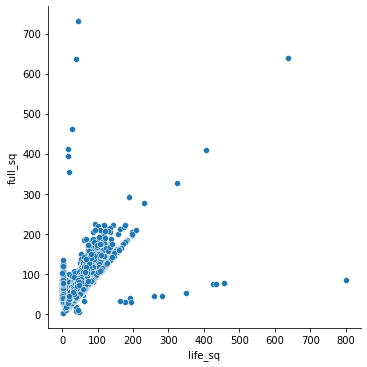

In [275]:
sns.relplot(x='life_sq', y='full_sq', data=df_whole_train)

Попробуем обработать те квартиры где жилая площадь превышает общую

In [277]:
X = df_whole_train.drop(columns=['id', 'timestamp', 'price'])
X_test = df_whole_test.drop(columns=['id', 'timestamp'])
y = df_whole_train.loc[:, 'price']

In [278]:
mask = X['life_sq'] > X['full_sq']
X.loc[mask, 'life_sq'] = X.loc[mask, 'life_sq'] / 10.0
mask = X_test['life_sq'] > X_test['full_sq']
X_test.loc[mask, 'life_sq'] = X_test.loc[mask, 'life_sq'] / 10.0

In [279]:
lgb_train = Dataset(X, y)
lgb_cv_res = cv(
    params={
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'seed': seed,
    },
    train_set=lgb_train,
    num_boost_round=100_000,
    stratified=False,
    early_stopping_rounds=100,
    verbose_eval=100,
    eval_train_metric=True,
    return_cvbooster=True,
)

[100]	cv_agg's train rmse: 2.09921e+06 + 9700.59	cv_agg's valid rmse: 2.80548e+06 + 113318
[200]	cv_agg's train rmse: 1.84067e+06 + 7935.73	cv_agg's valid rmse: 2.78897e+06 + 103590
[300]	cv_agg's train rmse: 1.66272e+06 + 9533.35	cv_agg's valid rmse: 2.79428e+06 + 96803.5


In [280]:
df_submit_2 = pd.DataFrame(index=df_whole_test.index)
df_submit_2['id'] = df_whole_test['id']
df_submit_2['predicted_price'] = np.mean([b.predict(X_test) for b in lgb_cv_res['cvbooster'].boosters], axis=0)
df_submit_2.to_csv(path_.join(submits_path, 'submit_2_life_sq_handle_greatest_full_sq.csv'))

RMSE = 2496732.1980. Так только хуже, попробуем их удалить на трейне а на тесте заменить

In [287]:
X = df_whole_train.drop(columns=['id', 'timestamp', 'price'])
X_test = df_whole_test.drop(columns=['id', 'timestamp'])
y = df_whole_train.loc[:, 'price']

In [288]:
mask = X['life_sq'] > X['full_sq']
X = X.loc[~mask, :]
y = y[~mask]
mask = X_test['life_sq'] > X_test['full_sq']
X_test.loc[mask, 'life_sq'] = X_test.loc[mask, 'life_sq'] / 10.0

In [289]:
lgb_train = Dataset(X, y)
lgb_cv_res = cv(
    params={
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'seed': seed,
    },
    train_set=lgb_train,
    num_boost_round=100_000,
    stratified=False,
    early_stopping_rounds=100,
    verbose_eval=100,
    eval_train_metric=True,
    return_cvbooster=True,
)

[100]	cv_agg's train rmse: 2.09825e+06 + 3802.81	cv_agg's valid rmse: 2.7974e+06 + 117967
[200]	cv_agg's train rmse: 1.84295e+06 + 6938.77	cv_agg's valid rmse: 2.77872e+06 + 109843
[300]	cv_agg's train rmse: 1.65815e+06 + 8529.1	cv_agg's valid rmse: 2.7784e+06 + 111210


In [290]:
df_submit_2 = pd.DataFrame(index=df_whole_test.index)
df_submit_2['id'] = df_whole_test['id']
df_submit_2['predicted_price'] = np.mean([b.predict(X_test) for b in lgb_cv_res['cvbooster'].boosters], axis=0)
df_submit_2.to_csv(path_.join(submits_path, 'submit_2_life_sq_handle_greatest_full_sq_v2.csv'))

RMSE = 2502719.8118. Так совсем плохо)

Посмотрим на фичу green_part

In [307]:
df_whole_train['green_part'].describe()

count    28987.000000
mean        13.339972
std         15.987800
min          0.000000
25%          1.480000
50%          8.370000
75%         19.920000
max        100.000000
Name: green_part, dtype: float64

In [308]:
df_whole_test['green_part'].describe()

count    1000.000000
mean       13.741470
std        17.048782
min         0.000000
25%         1.480000
50%         8.245000
75%        19.785000
max       100.000000
Name: green_part, dtype: float64

С ней вроде все ок

Теперь фича floor

In [97]:
df_whole_train = df_whole_train.drop(columns=['life_sq_frac', 'extra_sq'])
df_whole_test = df_whole_test.drop(columns=['life_sq_frac', 'extra_sq'])

In [309]:
df_whole_train['floor'].describe()

count    28830.000000
mean         7.666285
std          5.318808
min          0.000000
25%          3.000000
50%          6.000000
75%         11.000000
max         77.000000
Name: floor, dtype: float64

In [310]:
df_whole_test['floor'].describe()

count    995.000000
mean       7.901508
std        5.420390
min        1.000000
25%        3.000000
50%        7.000000
75%       11.000000
max       26.000000
Name: floor, dtype: float64

Есть выброс на трейне

In [311]:
df_whole_train[df_whole_train['floor'] == df_whole_train['floor'].max()][df_whole_train.columns[:13]]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment_condition,sub_area,price
24220,66291,2014-10-22,58,33.0,77.0,22.0,1.0,1986.0,2.0,10.0,3.0,57,13713700.0


Заменим его на максимальное значение этажа

In [312]:
X = df_whole_train.drop(columns=['id', 'timestamp', 'price'])
X_test = df_whole_test.drop(columns=['id', 'timestamp'])
y = df_whole_train.loc[:, 'price']

In [313]:
X['floor'] = X['floor'].replace(77.0, 22.0)

In [314]:
lgb_train = Dataset(X, y)
lgb_cv_res = cv(
    params={
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'seed': seed,
    },
    train_set=lgb_train,
    num_boost_round=100_000,
    stratified=False,
    early_stopping_rounds=100,
    verbose_eval=100,
    eval_train_metric=True,
    return_cvbooster=True,
)

[100]	cv_agg's train rmse: 2.09553e+06 + 9639	cv_agg's valid rmse: 2.80361e+06 + 115707
[200]	cv_agg's train rmse: 1.84315e+06 + 8520.81	cv_agg's valid rmse: 2.79255e+06 + 108113
[300]	cv_agg's train rmse: 1.66158e+06 + 10142.2	cv_agg's valid rmse: 2.79334e+06 + 103570


In [315]:
df_submit_2 = pd.DataFrame(index=df_whole_test.index)
df_submit_2['id'] = df_whole_test['id']
df_submit_2['predicted_price'] = np.mean([b.predict(X_test) for b in lgb_cv_res['cvbooster'].boosters], axis=0)
df_submit_2.to_csv(path_.join(submits_path, 'submit_2_floor_handle_outlier_v1.csv'))

RMSE = 2473710.8629. Качество стало хуже. Попробуем просто удалить его

In [321]:
X = df_whole_train.drop(columns=['id', 'timestamp', 'price'])
X_test = df_whole_test.drop(columns=['id', 'timestamp'])
y = df_whole_train.loc[:, 'price']

In [322]:
mask = X['floor'] != 77.0
X = X.loc[mask, :]
y = y[mask]

In [323]:
lgb_train = Dataset(X, y)
lgb_cv_res = cv(
    params={
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'seed': seed,
    },
    train_set=lgb_train,
    num_boost_round=100_000,
    stratified=False,
    early_stopping_rounds=100,
    verbose_eval=100,
    eval_train_metric=True,
    return_cvbooster=True,
)

[100]	cv_agg's train rmse: 2.09737e+06 + 16218	cv_agg's valid rmse: 2.80646e+06 + 71014.4
[200]	cv_agg's train rmse: 1.84051e+06 + 15664.1	cv_agg's valid rmse: 2.78808e+06 + 76978.1
[300]	cv_agg's train rmse: 1.66035e+06 + 11512.4	cv_agg's valid rmse: 2.78799e+06 + 76338.5


In [324]:
df_submit_2 = pd.DataFrame(index=df_whole_test.index)
df_submit_2['id'] = df_whole_test['id']
df_submit_2['predicted_price'] = np.mean([b.predict(X_test) for b in lgb_cv_res['cvbooster'].boosters], axis=0)
df_submit_2.to_csv(path_.join(submits_path, 'submit_2_floor_handle_outlier_v2.csv'))

RMSE = 2474930.5124. Оставим в покое эту фичу

Фича buil_year

In [325]:
df_whole_train['build_year'].describe()

count    1.604800e+04
mean     3.128189e+03
std      1.582736e+05
min      0.000000e+00
25%      1.966000e+03
50%      1.979000e+03
75%      2.005000e+03
max      2.005201e+07
Name: build_year, dtype: float64

In [326]:
df_whole_test['build_year'].describe()

count     559.000000
mean     1917.082290
std       360.430612
min         0.000000
25%      1967.000000
50%      1979.000000
75%      2004.500000
max      2017.000000
Name: build_year, dtype: float64

In [327]:
df_whole_train[df_whole_train['build_year'] == 0][df_whole_train.columns[:13]]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment_condition,sub_area,price
21,62937,2014-03-10,52,51.0,3.0,17.0,1.0,0.0,2.0,0.0,1.0,103,5539600.0
68,25172,2014-03-17,40,40.0,11.0,0.0,1.0,0.0,1.0,0.0,1.0,103,4469000.0
120,77648,2014-03-09,58,58.0,5.0,17.0,1.0,0.0,2.0,0.0,NaN,72,6306700.0
217,80760,2014-10-29,67,64.0,12.0,17.0,1.0,0.0,2.0,1.0,1.0,94,6518200.0
243,25697,2014-09-15,49,46.0,3.0,3.0,6.0,0.0,2.0,1.0,1.0,87,3566500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28787,32787,2015-01-08,79,42.0,3.0,0.0,1.0,0.0,3.0,0.0,1.0,102,9985500.0
28861,14677,2013-12-15,81,NaN,3.0,0.0,1.0,0.0,3.0,0.0,1.0,118,14931800.0
28894,98816,2015-04-12,39,NaN,16.0,17.0,1.0,0.0,1.0,1.0,NaN,103,5570500.0
28943,77750,2014-05-07,62,62.0,15.0,17.0,1.0,0.0,2.0,10.0,1.0,103,7330800.0


In [328]:
df_whole_test[df_whole_test['build_year'] == 0][df_whole_test.columns[:12]]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment_condition,sub_area
10,43879,2015-05-01,39,NaN,7.0,17.0,1.0,0.0,1.0,0.0,1.0,103
165,39911,2014-10-21,44,43.0,9.0,9.0,1.0,0.0,1.0,1.0,1.0,134
271,35860,2014-09-19,50,NaN,7.0,22.0,6.0,0.0,1.0,1.0,NaN,94
420,98379,2015-04-06,42,39.0,10.0,17.0,1.0,0.0,1.0,1.0,1.0,124
504,84196,2014-05-11,67,67.0,3.0,3.0,1.0,0.0,3.0,0.0,1.0,96
569,73483,2014-07-02,79,77.0,4.0,19.0,4.0,0.0,3.0,0.0,1.0,70
645,62737,2014-04-11,38,38.0,14.0,17.0,1.0,0.0,1.0,0.0,1.0,124
740,30372,2015-06-25,73,73.0,5.0,5.0,1.0,0.0,2.0,1.0,1.0,134


In [346]:
df_whole_test[df_whole_test['build_year'] == 2017][df_whole_test.columns[:12]]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment_condition,sub_area
251,98351,2015-06-25,37,19.0,15.0,24.0,6.0,2017.0,1.0,8.0,1.0,70
585,86862,2015-01-15,40,20.0,2.0,17.0,6.0,2017.0,1.0,8.0,1.0,103
613,21433,2014-04-18,46,NaN,13.0,20.0,4.0,2017.0,1.0,1.0,1.0,108
703,96917,2014-11-20,73,NaN,3.0,17.0,6.0,2017.0,2.0,9.0,1.0,94
840,44381,2015-05-28,37,36.0,18.0,18.0,1.0,2017.0,1.0,1.0,1.0,70
948,88559,2014-04-19,67,NaN,7.0,20.0,4.0,2017.0,2.0,1.0,1.0,108


In [352]:
np.sort(df_whole_train['build_year'].unique())[-20:]

array([2.0020000e+03, 2.0030000e+03, 2.0040000e+03, 2.0050000e+03,
       2.0060000e+03, 2.0070000e+03, 2.0080000e+03, 2.0090000e+03,
       2.0100000e+03, 2.0110000e+03, 2.0120000e+03, 2.0130000e+03,
       2.0140000e+03, 2.0150000e+03, 2.0160000e+03, 2.0170000e+03,
       2.0180000e+03, 4.9650000e+03, 2.0052009e+07,           nan])

Уберем выбросы из теста

In [353]:
X = df_whole_train.drop(columns=['id', 'timestamp', 'price'])
X_test = df_whole_test.drop(columns=['id', 'timestamp'])
y = df_whole_train.loc[:, 'price']

In [354]:
X['build_year'] = X['build_year'].clip(upper=2014)
X_test['build_year'] = X_test['build_year'].clip(upper=2014)

In [355]:
lgb_train = Dataset(X, y)
lgb_cv_res = cv(
    params={
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'seed': seed,
    },
    train_set=lgb_train,
    num_boost_round=100_000,
    stratified=False,
    early_stopping_rounds=100,
    verbose_eval=100,
    eval_train_metric=True,
    return_cvbooster=True,
)

[100]	cv_agg's train rmse: 2.09452e+06 + 8219.34	cv_agg's valid rmse: 2.80809e+06 + 118078
[200]	cv_agg's train rmse: 1.83972e+06 + 9404.55	cv_agg's valid rmse: 2.79792e+06 + 118083
[300]	cv_agg's train rmse: 1.65492e+06 + 10606.2	cv_agg's valid rmse: 2.80078e+06 + 117175


In [356]:
df_submit_2 = pd.DataFrame(index=df_whole_test.index)
df_submit_2['id'] = df_whole_test['id']
df_submit_2['predicted_price'] = np.mean([b.predict(X_test) for b in lgb_cv_res['cvbooster'].boosters], axis=0)
df_submit_2.to_csv(path_.join(submits_path, 'submit_2_build_year_handle_outliers_v1.csv'))

RMSE = 2496778.4039. Хуже

Поэксперементируем с таргетом

In [368]:
X = df_whole_train.drop(columns=['id', 'timestamp', 'price'])
X_test = df_whole_test.drop(columns=['id', 'timestamp'])
y = df_whole_train.loc[:, 'price']

In [369]:
y = y.clip(upper=y.quantile(0.995))

In [370]:
lgb_train = Dataset(X, y)
lgb_cv_res = cv(
    params={
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'seed': seed,
    },
    train_set=lgb_train,
    num_boost_round=100_000,
    stratified=False,
    early_stopping_rounds=100,
    verbose_eval=100,
    eval_train_metric=True,
    return_cvbooster=True,
)

[100]	cv_agg's train rmse: 2.01712e+06 + 7229.49	cv_agg's valid rmse: 2.4996e+06 + 29653.7
[200]	cv_agg's train rmse: 1.78594e+06 + 9018.39	cv_agg's valid rmse: 2.49176e+06 + 30216.8


In [371]:
df_submit_2 = pd.DataFrame(index=df_whole_test.index)
df_submit_2['id'] = df_whole_test['id']
df_submit_2['predicted_price'] = np.mean([b.predict(X_test) for b in lgb_cv_res['cvbooster'].boosters], axis=0)
df_submit_2.to_csv(path_.join(submits_path, 'submit_2_epx_clip_target.csv'))

RMSE = 2446443.5593. Чем это может быть обусловлено???